# Support Vector Machines - Ejercicio

En este ejercicio, utilizaremos máquinas de vectores soporte (SVM) para construir un clasificador de spam.  Empezaremos con SVM en algunos conjuntos de datos 2D sencillos para ver cómo funcionan.  A continuación, realizaremos un trabajo de preprocesamiento en un conjunto de correos electrónicos sin procesar y crearemos un clasificador en los correos electrónicos procesados utilizando una SVM para determinar si son spam o no.

Lo primero que vamos a hacer es examinar un simple conjunto de datos bidimensionales y ver cómo funciona una SVM lineal en el conjunto de datos para distintos valores de C (similar al término de regularización en la regresión lineal/logística).  Carguemos los datos.
## Ejercicio 1
#### 1. Cargar bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Cargar datos
Carga el fichero *ejer_1_data1.mat*. Busca la forma de cargar este tipo de ficheros. **scipy.io.loadmat**

In [2]:
from scipy.io import loadmat

mat = loadmat('data/ejer_1_data1.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
mat['y']

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8)

#### 3. Crea un DataFrame con las features y el target

In [5]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df.head()

,x1,x2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [6]:
df['y'].value_counts()

0    30
1    21
Name: y, dtype: int64

#### 4. Traza un diagrama de dispersión/ scatterplot con los datos

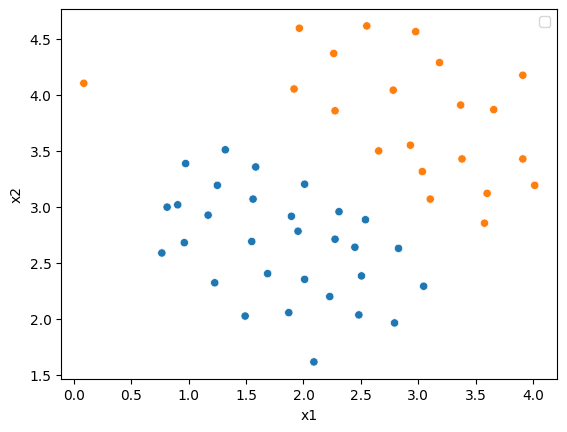

In [8]:
plt.figure()
sns.scatterplot(data=df, x='x1', y='x2', hue='y')
plt.legend([]);

Observa que hay un outlier atípico que se sitúa aparte de los demás.  Las clases siguen siendo linealmente separables, pero el ajuste es muy estrecho.  Te recomiendo entrenar un SVM lineal para aprender el límite de clase.

#### 5. LinearSVC
Declarar un SVC Lineal con los hiperparamentados:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [9]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1, loss='hinge', max_iter=10000)

#### 6. Prueba el rendimiento (puntuación)
Para el primer experimento usaremos C=1 y veremos cómo funciona.

In [10]:
X = df[['x1','x2']]
y = df['y']

In [11]:
svc.fit(X,y)
svc.score(X,y)

0.9803921568627451

¿Ha clasificado correctamente outlier?

#### 7. Aumenta el valor de C hasta que obtengas un clasificador perfecto

In [12]:
svc_2 = LinearSVC(C=500, loss='hinge', max_iter=1000000)
svc_2.fit(X,y)
svc_2.score(X,y)

1.0

Esta vez hemos obtenido una clasificación perfecta de los datos de entrenamiento, sin embargo, al aumentar el valor de C hemos creado un límite de decisión que ya no se ajusta naturalmente a los datos.  Podemos visualizar esto observando el nivel de confianza para cada predicción de clase, que es una función de la distancia del punto al hiperplano.

#### 8. Representar la función de decisión
Obtener la salida de `decision_function()` para el primer modelo. Trazar un gráfico de dispersión con X1, X2 y un rango de colores basado en `decision_function()`.

In [15]:
conf_level = svc.decision_function(X)
conf_level

array([ 0.80285023,  0.38392856,  1.37751362,  0.5211878 ,  0.33342501,
        0.86872536,  0.68654362,  1.61123642,  0.83450211,  1.16715348,
        1.07326238,  0.22982509,  0.33184066,  0.79582691,  0.31581451,
        1.27411492,  1.21021807,  1.        ,  0.56476804,  0.38991316,
       -0.43521604, -0.30878618, -0.68619857, -0.55395522, -0.33244275,
       -0.29376754, -0.44062707, -0.98391945, -0.68556135, -1.32842061,
       -1.00373007, -1.49226196, -0.61136147, -0.68339244, -0.99998645,
       -1.1526885 , -1.57836225, -1.35594349, -1.0323541 , -1.18500554,
       -0.771371  , -0.76687929, -0.4664535 , -0.9999262 , -0.51026522,
       -0.85856062, -1.55896494, -0.2548211 , -1.11360961, -1.54715763,
       -0.70992425])

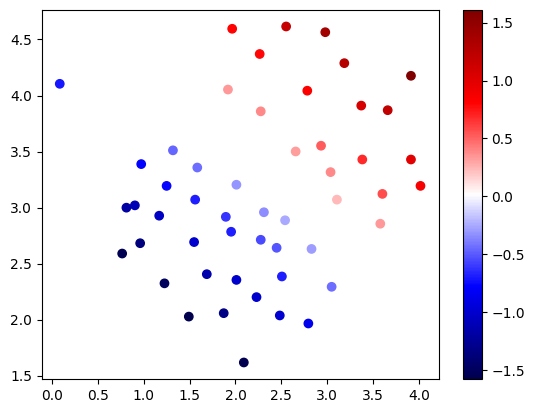

In [16]:
plt.scatter(df['x1'], df['x2'], c=conf_level, cmap='seismic')
plt.colorbar();

#### 9. Haz lo mismo con el segundo modelo

In [17]:
conf_level = svc_2.decision_function(X)
conf_level

array([ 11.68942007,   5.92497461,  14.77815049,   5.27588763,
         1.00011344,   5.5718997 ,   5.6371331 ,  14.29185155,
         9.31016078,  13.83212872,  10.03683093,   1.41221111,
         6.53223285,  10.60827916,   3.8849629 ,  12.91832795,
        10.61742803,   7.39915352,   3.53194357,   3.44863381,
        -0.99990405,  -1.        ,  -5.06325286,  -4.65121077,
        -2.26904271,  -3.5671611 ,  -5.95588251, -10.19359795,
        -6.90606238, -12.03572723,  -8.8366378 , -11.72486916,
        -4.02664736,  -3.72122374,  -7.25287107,  -9.43750441,
       -13.58231756,  -9.30146256,  -6.34595617,  -6.87271746,
        -2.74791616,  -3.62226233,  -0.46563222,  -9.52604651,
        -4.73695026,  -9.82071832, -15.36779821,  -2.16450625,
        -6.37605479, -10.80252445,   0.91266721])

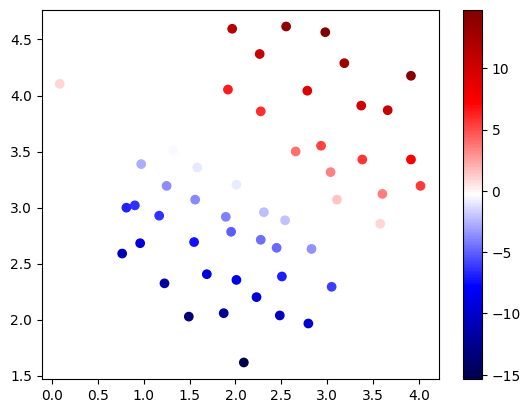

In [18]:
plt.scatter(df['x1'], df['x2'], c=conf_level, cmap='seismic')
plt.colorbar();

In [19]:
svc_2.coef_[0]

array([3.32519423, 9.22717273])

In [20]:
svc_2.intercept_[0]

-37.2475766635678

In [24]:
svc_2.coef_

array([[3.32519423, 9.22717273]])

In [26]:
def hyperplane(x, w, b):
    return w[0]*x[0] + w[1]*x[1] + b

hyperplane([2.9781  , 4.5651  ], svc_2.coef_[0], svc_2.intercept_[0])

14.778150492655612

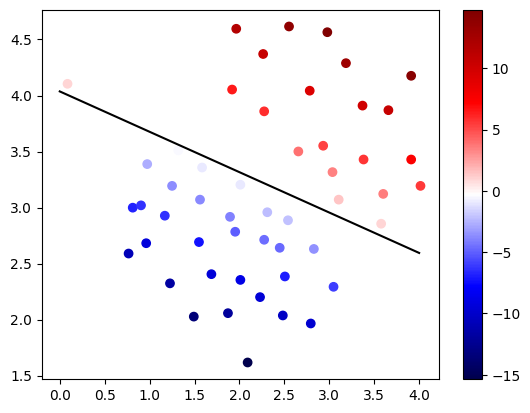

In [28]:
x = np.linspace(0, 4, 100)
w = svc_2.coef_[0]
b = svc_2.intercept_[0]
plt.scatter(df['x1'], df['x2'], c=conf_level, cmap='seismic')
plt.plot(x, -w[0] / w[1] * x - b / w[1], 'k-')
plt.colorbar();

y = b + w[0]*x1 + w[1]*x2

(y - b - w[0]*x1)/w[1] = x2 

x2 = y/w[1] - b/w[1] - w[0]/w[1]*x1

-w[0]/w[1]*x1 - b/w[1] = x2 - y/w[1]

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

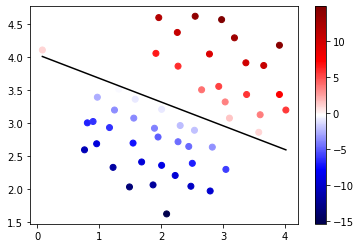

In [44]:
w = svc_2.coef_[0]
b = svc_2.intercept_[0]
x_points = df['x1'].sort_values()
y_points = -w[0]/w[1] * x_points - b/w[1]

plt.scatter(df['x1'], df['x2'], c=conf_level, cmap='seismic')
plt.plot(x_points, y_points, c='k')
plt.colorbar();

Ahora vamos a pasar de un SVM lineal a uno que es capaz de clasificación no lineal utilizando kernels.  Primero tenemos la tarea de implementar una función de kernel gaussiano.  Aunque scikit-learn tiene un kernel gaussiano incorporado, por transparencia vamos a implementar uno desde cero.

## Ejercicio 2

A continuación vamos a examinar otro conjunto de datos, esta vez con un límite de decisión no lineal.

#### 1. Cargar `ejer_1_data2.mat`

In [29]:
mat = loadmat('data/ejer_1_data2.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

In [30]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 2. Crear un DataFrame con las features y el target

In [31]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df.head()

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [32]:
df['y'].value_counts()

1    480
0    383
Name: y, dtype: int64

In [33]:
X = df[['x1','x2']]
y = df['y']

#### 3. Traza un diagrama de dispersión con los datos

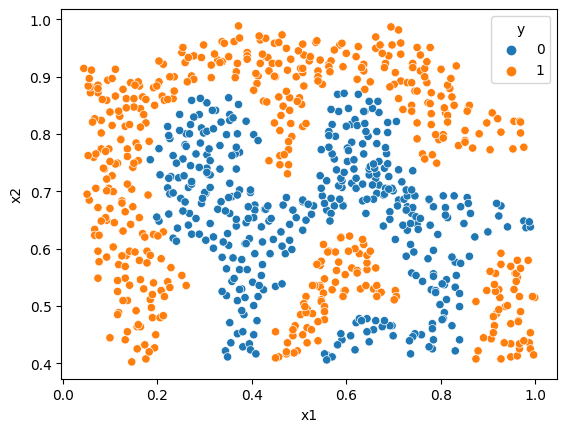

In [34]:
sns.scatterplot(data=df, x='x1', y='x2', hue='y');

Para este conjunto de datos construiremos un SVM utilizando un kernel de RBF incorporado y examinaremos su precisión en los datos de entrenamiento.  Para visualizar el límite de decisión, esta vez sombrearemos los puntos en función de la probabilidad prevista de que la instancia tenga una etiqueta de clase negativa.  Comprueba si el resultado acierta en la mayoría de los casos.

#### 4. Declarar un SVC con estos hiperparámetros
```Python
SVC(C=100, gamma=10, probability=True)
```


In [36]:
from sklearn.svm import SVC
svc = SVC(C=100, gamma=10, probability=True)

#### 5. Ajustar el clasificador y obtener el score

In [37]:
svc.fit(X,y)
svc.score(X,y)

0.9698725376593279

#### 6. Traza el diagrama de dispersión y la probabilidad de predecir 0 con un [color secuencial](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [38]:
probabilities = svc.predict_proba(X)[:,1]
probabilities

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.99999529e-01,
       9.95238894e-01, 9.99987127e-01, 9.99999942e-01, 9.91110209e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.89574540e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       7.65881715e-01, 4.32826304e-01, 1.00000000e+00, 1.00000000e+00,
       9.87775476e-01, 9.99992632e-01, 9.92753607e-01, 8.89247928e-01,
       9.84360746e-01, 9.99998506e-01, 9.99999263e-01, 9.99999836e-01,
       9.99997807e-01, 9.80355227e-01, 8.52242402e-01, 9.75729362e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99999997e-01, 9.99999889e-01,
       9.99992733e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

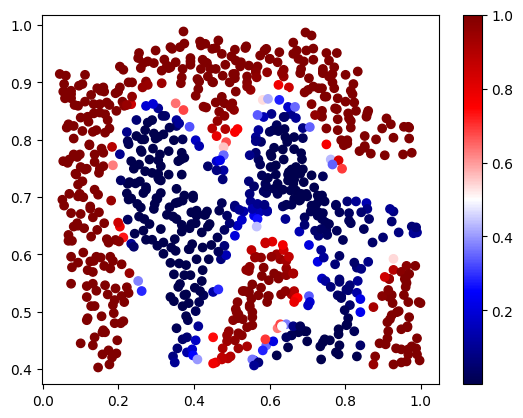

In [39]:
plt.scatter(df['x1'], df['x2'], c = probabilities, cmap='seismic');
plt.colorbar()

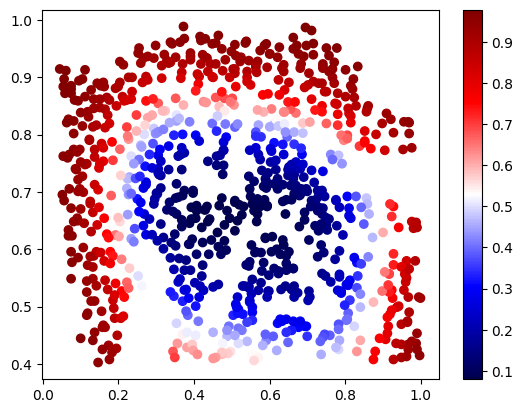

In [40]:
from sklearn.svm import SVC
svc = SVC(C=0.1, gamma=10, probability=True)

svc.fit(X,y)
svc.score(X,y)
probabilities = svc.predict_proba(X)[:,1]

plt.scatter(df['x1'], df['x2'], c = probabilities, cmap='seismic');
plt.colorbar()